# Regressão Linear - Multiplas Variáveis

In [1]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Gerar Dataset

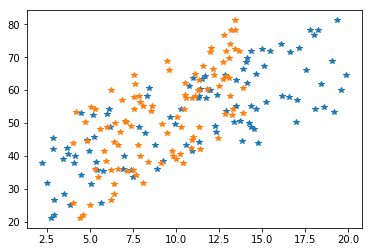

In [2]:
np.random.seed(101)

a = np.random.uniform(2, 20, 100)
b = np.random.uniform(4, 14, 100)

label = []
label = (2*a + 3*b + 2.2)

plt.plot(a, label, '*')
plt.plot(b, label, '*')

In [3]:
a_df = pd.DataFrame(data=a, columns=['A'])
b_df = pd.DataFrame(data=b, columns=['B'])
label_df = pd.DataFrame(data=label, columns=['LABEL'])

data = pd.concat([a_df, b_df], axis=1)
data.head()

,A,B
0,11.295175,10.945647
1,12.272017,7.424568
2,2.512536,8.123906
3,5.087390,6.397910
4,14.334986,13.688360


### Normalizando Dados

In [4]:
data_norm = data.apply(lambda x: (x - x.min())/ (x.max() - x.min()) ).values
label_norm = label_df.apply(lambda x: (x - x.min())/ (x.max() - x.min()) ).values

## Gerar Grafo - TensorFlow

In [33]:
n = 2 #number of features
W = tf.Variable(tf.zeros([n, 1]))
bias = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, [100, n])
y = tf.placeholder(tf.float32, [100, 1])

In [34]:
y_model = tf.matmul(x, W) + bias

In [35]:
cost = tf.reduce_sum(tf.square(y-y_model))

In [36]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

In [37]:
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    sess.run(init)
    for _ in range(10000):
        feed = {x:data_norm, y:label_norm}
        sess.run(train, feed_dict=feed)
        
    ma, mb = sess.run([W, bias])
    

In [41]:
print(ma, mb)

[[ 0.58768988]
 [ 0.49489602]] [-0.04018835]
